## Preprocessing data

#### Library

In [ ]:
from deep_translator import GoogleTranslator
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unidecode import unidecode 
from collections import Counter
from langdetect import detect
import seaborn as sns
import pandas as pd
import nltk
import re

#### Cleaning text

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load dataset
df = pd.read_csv("G:\\Malk\\Qafza\\Final_Project\\data\\news.csv")

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Additional custom stopwords (optional)
custom_stopwords = {
    "will", "new", "york", "years", "one", "said", "united", "state", "trump", "time",
    "country", "two", "city", "china", "first", "woman", "american", "make", "made",
    "work", "company", "take", "family", "president", "government", "plan", "life",
    "people", "say", "says", "saying", "may", "show", "look", "help", "many", "home",
    "year", "day", "even", "women", "team", "teams", "states", "child", "russia", "would",
    "part", "world", "want", "set", "way", "found", "group", "played", "playing", "time", "election", "charge",
    "player", "play", "countries", "country", "plays", "become", "becomes", "became", "right",
    "three", "come", "needing", "came", "comes", "weeks", "week", "need", "needed",
    "needs", "official", "still", "including", "former", "last", "party", "star",
    "back", "place", "change", "return", "leader", "offer", "history", "season",
    "support", "couple", "met", "know", "find", "hope", "others", "power", "game",
    "talk", "toke", "token", "call", "called", "calling", "calls", "million", "can",
    "give", "given", "giving", "gives", "go", "going", "gone", "goes", "could", "get", "also", "open",
    "take", "taken", "taking", "takes", "bring", "bringing", "brought", "brings",
    "old", "run", "running", "ran", "runs", "use", "used", "using", "uses",
    "try", "trying", "tried", "tries", "artist", "business", "police", "report", "protest", "case", "start", "started",
    "starts", "end", "ending", "ended", "much", "big", "large", "top", "official", "case", "month", "plan", "appear", "live", "long", "man",
    "move", "moves", "moved", "moving", "tell", "tells", "told", "telling", "face", "faces", "faced", "facing",
    "show", "shows", "showed", "showing", "know", "knows", "knew", "knowing", "offer", "offers", "offered", "offering",
    "begin", "begins", "began", "beginning", "hold", "holds", "held", "holding", "put", "puts", "putting", "took",
    "bring", "brings", "brought", "bringing", "call", "calls", "called", "calling", "run", "runs", "ran", "running", "use", "uses", "used", "using",
    "try", "tries", "tried", "trying", "see", "sees", "saw", "seeing", "seen", "seening"
}
all_stopwords = stop_words.union(custom_stopwords)

# Function to normalize text (lowercase, remove special characters)
def normalize_text(text):
    text = text.lower().strip() 
    text = unidecode(text) 
    text = re.sub(r'[^a-z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    return text

# Function to map POS tags for better lemmatization
def get_wordnet_pos_bulk(words):
    tag_dict = defaultdict(lambda: wordnet.NOUN, {"J": wordnet.ADJ, "V": wordnet.VERB, "R": wordnet.ADV})
    return [(word, tag_dict.get(pos[0].upper(), wordnet.NOUN)) for word, pos in nltk.pos_tag(words)]

# Main preprocessing function
def preprocess_text(text):
    if not isinstance(text, str) or len(text) < 10: 
        return None  
    text = normalize_text(text)  # Normalize text

    # Tokenize and remove stopwords
    words = [word for word in word_tokenize(text) if word not in all_stopwords and len(word) > 2]
    
    # POS tagging and lemmatization
    tagged_words = get_wordnet_pos_bulk(words)
    cleaned_words = [lemmatizer.lemmatize(word, pos) for word, pos in tagged_words]

    return ' '.join(cleaned_words) if cleaned_words else None


# Apply text cleaning to the dataset
df['clean_text'] = df['news'].apply(preprocess_text)

# Remove empty rows after cleaning
df.dropna(subset=['clean_text'], inplace=True)

# Save cleaned text to CSV
df.to_csv("G:\Malk\Qafza\Final_Project\data\cleaned_news.csv", index=False)

print("✅ Cleaning completed! Cleaned data saved to 'cleaned_news.csv'.")


[nltk_data] Downloading package punkt to C:\Users\Aya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Aya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Aya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Cleaning completed! Cleaned data saved to 'cleaned_news.csv'.


#### EDA

In [3]:
df

,date,news,neg,neu,pos,compound,sentiment,clean_text
0,2007-07-07,It was a long antipodean night. While there’s ...,0.059000,0.87800,0.064000,0.051600,POSITIVE,antipodean night reflection national taste res...
1,2007-07-07,In Mexico there are no licensing or registrati...,0.044000,0.95600,0.000000,-0.296000,NEGATIVE,mexico licensing registration requirement real...
2,2007-07-07,The government has until Monday to protect the...,0.000000,0.89400,0.106000,0.381800,POSITIVE,monday protect redact names baseball player su...
3,2007-07-07,A record-breaking heat wave in the Southwest i...,0.197505,0.66149,0.141005,0.997491,POSITIVE,record breaking heat wave southwest push north...
4,2007-07-07,England started its Live Earth concert at Wemb...,0.033000,0.94500,0.022000,-0.177900,NEGATIVE,england earth concert wembley stadium internat...
...,...,...,...,...,...,...,...,...
427477,2024-08-02,"Cars were set alight, and beer cans and stones...",0.138000,0.80000,0.062000,-0.401900,NEGATIVE,car alight beer can stone throw demonstration ...
427478,2024-08-02,Great Britain continue their most successful s...,0.000000,0.67800,0.322000,0.874800,POSITIVE,great britain continue successful summer olymp...
427479,2024-08-02,Pentagon announces Middle East reinforcements ...,0.196000,0.80400,0.000000,-0.599400,NEGATIVE,pentagon announces middle east reinforcement i...
427480,2024-08-03,Bucharest has lifted a moratorium on bear hunt...,0.000000,0.82800,0.172000,0.401900,POSITIVE,bucharest lift moratorium bear hunt population...


C:\Users\Aya\AppData\Local\Temp\ipykernel_20360\1381781458.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_counts), y=list(positive_words), palette='viridis')
C:\Users\Aya\AppData\Local\Temp\ipykernel_20360\1381781458.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_counts), y=list(negative_words), palette='Reds')


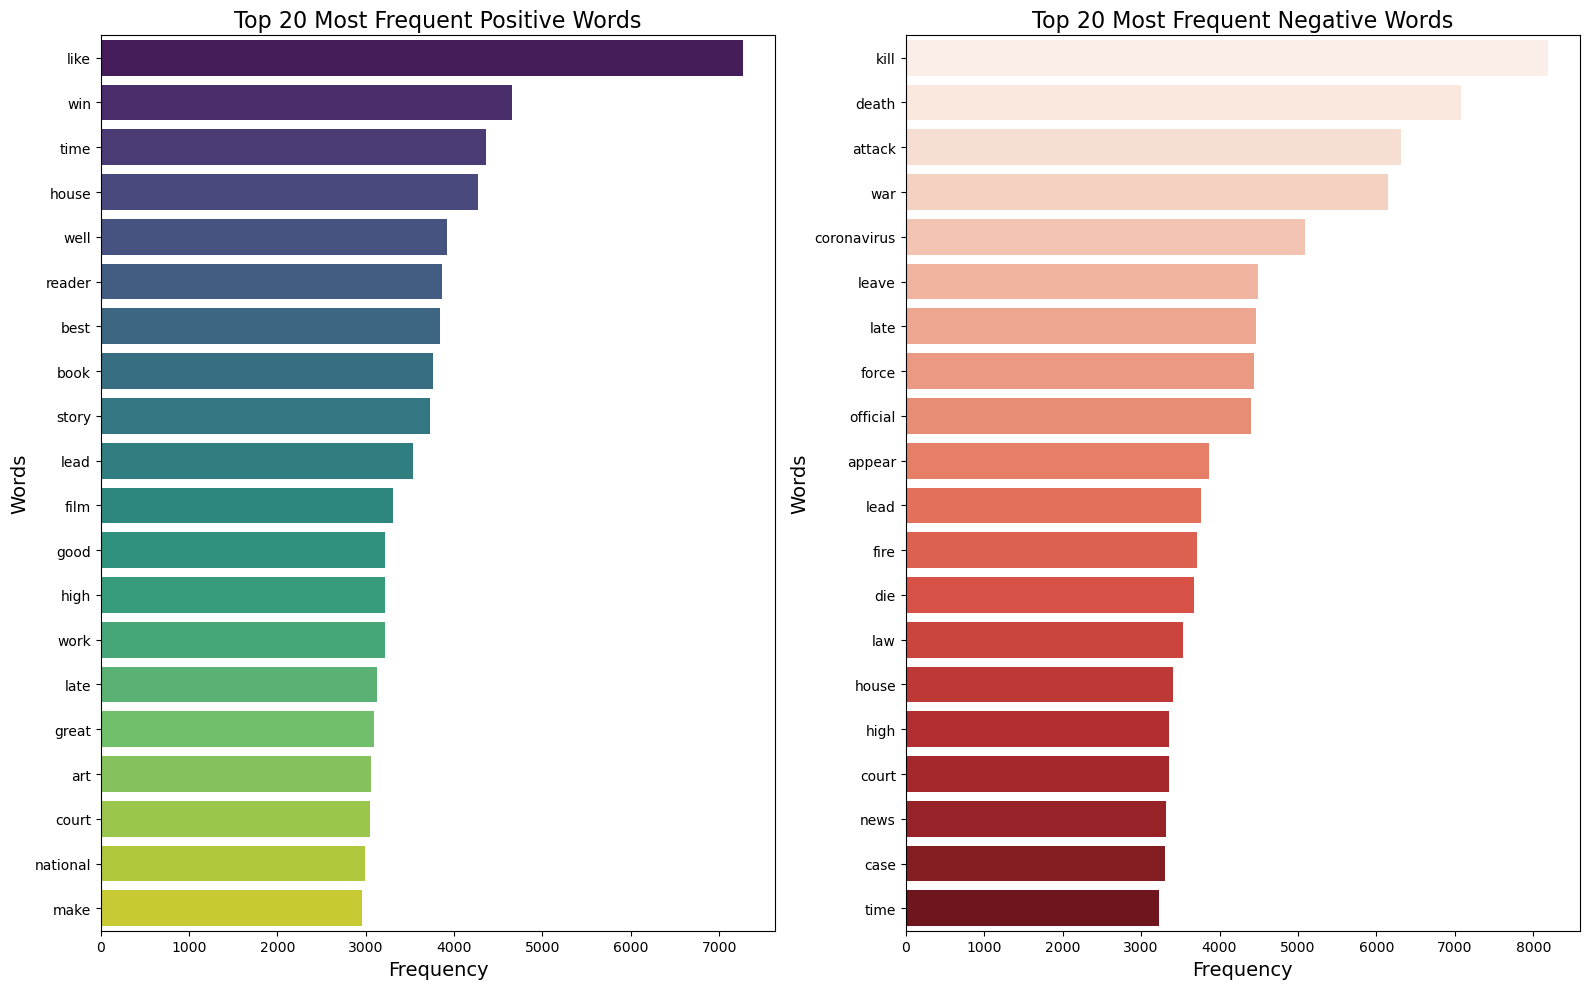

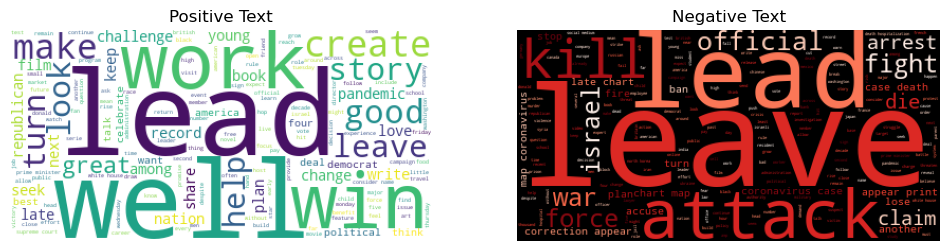

In [ ]:


# Separate the positive and negative texts
positive_text = " ".join(df[df['sentiment'] == 'POSITIVE']['clean_text'])
negative_text = " ".join(df[df['sentiment'] == 'NEGATIVE']['clean_text'])

# Tokenize the positive and negative texts and count word frequencies
positive_words = positive_text.split()
negative_words = negative_text.split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 20 most frequent words for positive and negative text
most_common_positive = positive_word_counts.most_common(20)
most_common_negative = negative_word_counts.most_common(20)

positive_words, positive_counts = zip(*most_common_positive)
negative_words, negative_counts = zip(*most_common_negative)

# Plotting the word frequency distribution for positive and negative words
plt.figure(figsize=(16, 10))

# Positive words
plt.subplot(1, 2, 1)
sns.barplot(x=list(positive_counts), y=list(positive_words), palette='viridis')
plt.title('Top 20 Most Frequent Positive Words', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)

# Negative words
plt.subplot(1, 2, 2)
sns.barplot(x=list(negative_counts), y=list(negative_words), palette='Reds')
plt.title('Top 20 Most Frequent Negative Words', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)

plt.tight_layout()
plt.show()

# WordCloud Visualization
plt.figure(figsize=(12, 5))

# Positive WordCloud
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(background_color='white').generate(positive_text))
plt.axis("off")
plt.title("Positive Text")

# Negative WordCloud
plt.subplot(1, 2, 2)
plt.imshow(WordCloud(background_color='black', colormap='Reds').generate(negative_text))
plt.axis("off")
plt.title("Negative Text")

plt.show()
